In [22]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#1. Build a statistical model to explain the relationship between sales and promotional efforts andinterpret the regression output

In [24]:
import pandas as pd
data = pd.read_csv(r"C:\Users\91958\Documents\SEM2\Applied_Stat_660\GoodBelly_dataset.csv")
data

,Date,Region,Store,Units Sold,Average Retail Price,Sales Rep,Endcap,Demo,Demo1-3,Demo4-5,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,5/4/2010,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/11/2010,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/18/2010,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/25/2010,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/1/2010,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,6/15/2010,SW,Veterans,192.685157,4.390000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,6/22/2010,SW,Veterans,173.720882,4.390000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,6/29/2010,SW,Veterans,278.582872,4.390000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,7/6/2010,SW,Veterans,122.229767,4.190000,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Defining the independant variables
X = data[['Average Retail Price', 'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural', 'Fitness']]
X = sm.add_constant(X)

# Defining the dependant variables
y = data['Units Sold']
# Add a constant to the independant variables
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     353.7
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:39:48   Log-Likelihood:                -7719.7
No. Observations:                1386   AIC:                         1.546e+04
Df Residuals:                    1377   BIC:                         1.550e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  298.4881 

In [26]:
#2. Does the in-store demo program boost the sales? If so, for how long does the sales lift last?

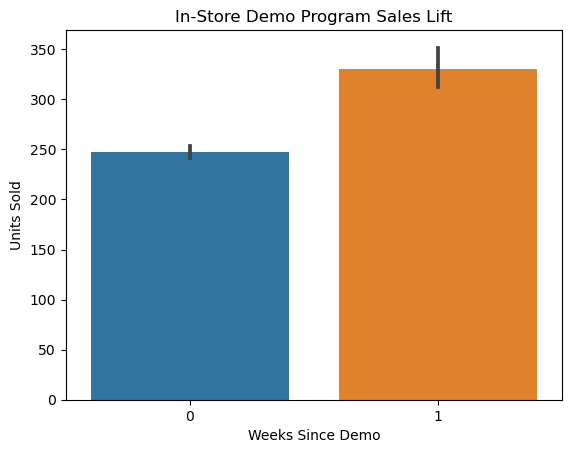

In [27]:
# Deemonstrating the demo sales lift using bar plot

demo_lift =data[['Demo', 'Demo1-3', 'Demo4-5', 'Units Sold']]
sns.barplot(x='Demo4-5', y='Units Sold', data=demo_lift)
plt.title('In-Store Demo Program Sales Lift')
plt.xlabel('Weeks Since Demo')
plt.ylabel('Units Sold')
plt.show()

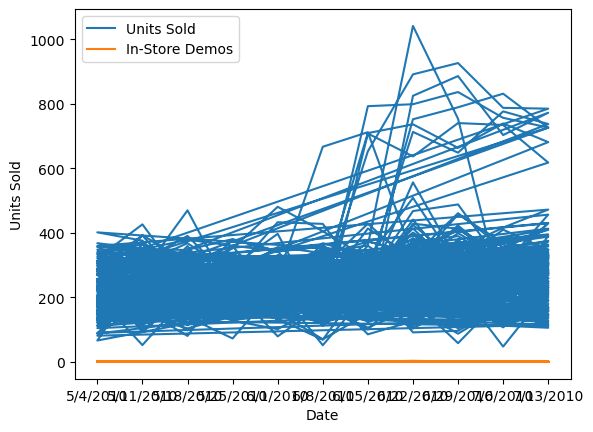

In [28]:
# time series plot

plt.plot(data['Date'], data['Units Sold'], label='Units Sold')
plt.plot(data['Date'], data['Demo'] + data['Demo1-3'] + data['Demo4-5'], label='In-Store Demos')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

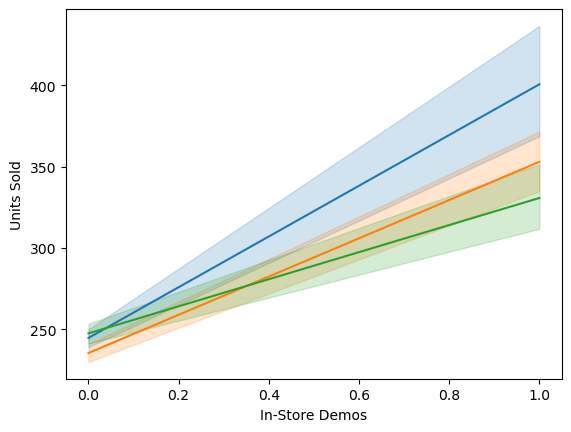

In [29]:
# line plot

sns.lineplot(x='Demo', y='Units Sold', data=data)
sns.lineplot(x='Demo1-3', y='Units Sold', data=data)
sns.lineplot(x='Demo4-5', y='Units Sold', data=data)
plt.xlabel('In-Store Demos')
plt.ylabel('Units Sold')
plt.show()

In [30]:
#3. Does the placement of the product within the store affect the sales?

In [31]:
# DefinE independent and dependent variables
X = data['Endcap']
y = data['Units Sold']

# Add intercept column to X
X = sm.add_constant(X)

# Fit linear regression model using ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     751.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          1.63e-132
Time:                        11:39:56   Log-Likelihood:                -8193.0
No. Observations:                1386   AIC:                         1.639e+04
Df Residuals:                    1384   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.6958      2.448     98.308      0.0

In [32]:
#The linear regression analysis highlights the Endcap variable as a significant predictor of the number of GoodBelly products sold.
#Each unit increase in the Endcap variable is associated with a significant increase of 343.2292 units in the number of products sold. 
#The R-squared value of the model is 0.352, meaning that the Endcap variable explains 35.2% of the variation in the number of products sold. 
#These findings indicate that the placement of the product within the store, particularly at the endcap, is a critical factor affecting the sales of GoodBelly's products.
#The regression analysis shows that the products placed at the endcap have higher sales than those placed elsewhere.

In [33]:
#4. What other factors affect the sales of GoodBelly’s products? Based on the regression output,what are your recommendations to GoodBelly’s management?

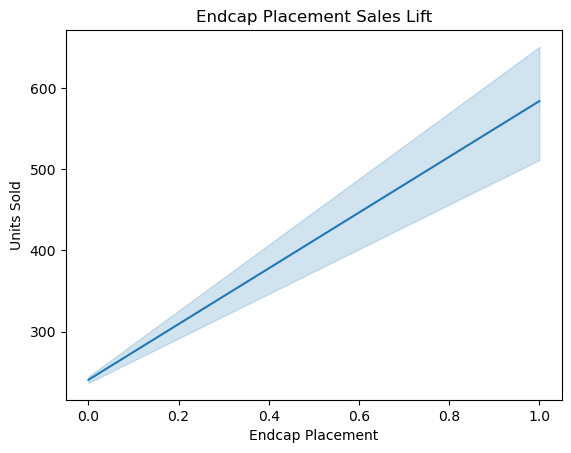

In [35]:
endcap = data[['Endcap', 'Units Sold']]
sns.lineplot(x='Endcap', y='Units Sold', data=endcap)
plt.title('Endcap Placement Sales Lift')
plt.xlabel('Endcap Placement')
plt.ylabel('Units Sold')
plt.show()